In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
url = "https://raw.githubusercontent.com/lmcanavals/ml/main/data/jokes.csv"
data = pd.read_csv(url)

In [ ]:
data.head()

,Joke,funny?
0,"Telling my daugthers date that ""she has lice a...",0
1,What should you do before criticizing Pac-Man?...,0
2,What's the difference between an illegal Mexic...,0
3,What do you call a barbarian you can't see? an...,0
4,"How do you spell Canda? C,eh,N,eh,D,eh",0


#PREGUNTA 1

PREGUNTA: Qué conclusiones puede usted proporcionar luego de inspeccionar algunos
chistes, puede usted notar algún patrón particular para los chistes marcados como 0 y los
marcados como 1?

RESPUESTA: Vemos que hay data sesgada, pues hay mucha diferencia de la cantidad de datos.
Tenemos grandes cantidades de chistes considerados 0 y pocos 1

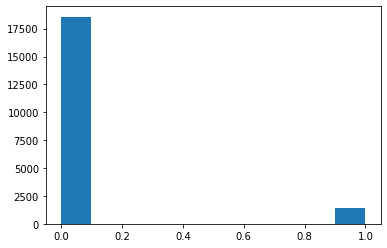

In [ ]:
plt.hist(data["funny?"])
plt.show()

#PREGUNTA 2

PREGUNTA: Explique si es posible usar árboles de decisión en el dataset en su estado actual

RESPUESTA: En su estado actual de la data, en su forma de letras, no es posible aplicar arboles de desición, pues realizan operaciones matemáticas. Por ello, necesita que lo convirtamos en una representación numérica, específicamente de forma matricial. Por ello, se usará la representación TF-IDF (vectorizacion)

#PREGUNTA 3

 PREGUNTA: Debe vectorizar el dataset, explique los pasos que realice.

##RESPUESTA A LA PREGUNTA 3

Primero, necesitamos la librería "TfidfVectorizer" para darle una representación numérica a nuestra data. Además, se usa la librería "RegexpTokenizer" para indicarle como queremos que tokenize nuestra data.

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

Obtenemos nuestro "x"  - Le pasamos los stop words para que los quite de nuestro dataset y limpiar un poco

In [ ]:
sw = stopwords.words("english")
tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
vectorizer = TfidfVectorizer(stop_words=sw,tokenizer = tokenizer.tokenize)
x = vectorizer.fit_transform(data["Joke"])
tokens = vectorizer.get_feature_names_out()

Podemos ver como está el tamaño de nuestro "x" y cómo tokanizó los documentos

In [ ]:
print(x.shape)
print(tokens[100:120])

(20000, 19921)
['accordion' 'accosted' 'accosting' 'account' 'accountability'
 'accountant' 'accountants' 'accounting' 'accounts' 'accross' 'acct'
 'acctualy' 'accuracy' 'accurate' 'accurately' 'accused' 'accuser' 'ace'
 'acetone' 'achieve']


Obtenemos nuestro "y"

In [ ]:
y = data["funny?"]

In [ ]:
print(y.shape)

(20000,)


Para realizar el entrenamiento para nuestros algoritmos, dividimos los datos de entrenamiento con los de prueba en una proporción de 70 a 30

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 19921)
(6000, 19921)
(14000,)
(6000,)


#PREGUNTA 4

PREGUNTA: Aplique el algoritmo KNN visto en clase con 3 funciones de distancia distintas y
realice un análisis de los resultados obtenidos, indique cuál considera que es el mejor
resultado y esboce una opinión del por qué.

RESPUESTA: Se probó 3 distancias (euclidiana, manhattan y coseno), donde se pudo observar que la manhattan tuvo mejor resultado para este dataset (accuracy de 0.9535) y superó a la distancia euclidiana y coseno que obtubieron mismo resultado(accuracy:0.9425).
Yo personalmente, recomendaría la distancia manhattan, pues son operaciones más simples para realizar el cálculo de una distancia a diferencia que el del coseno y euclidiana, tmb porque para este dataset tuvo mejores resultados. Además, al ver su matriz de confusion, la distancia Manhatam obtiene mejores pronósticos en cuanto a los "1" de columna "funny?" que son minoría.


Utilizamos la librería "KNeighborsClassifier" para realizar los algoritmos de knn y poder clasificar

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Calculamos knn con distancia euclidiana

In [ ]:
modelE = KNeighborsClassifier(n_neighbors=5,p=2)

In [ ]:
modelE.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_hat = modelE.predict(x_test)

Calculamos su accuracy y matriz de confusion

In [ ]:
print(accuracy_score(y_hat,y_test))
print(confusion_matrix(y_hat,y_test))

0.9425
[[5565  326]
 [  19   90]]


### Calculamos knn con distancia Manhatan

In [ ]:
modelM = KNeighborsClassifier(n_neighbors=5, p = 1)

In [ ]:
modelM.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_hatM = modelM.predict(x_test)

Calculamos su accuracy y matriz de confusion

In [ ]:
print(accuracy_score(y_hatM,y_test))
print(confusion_matrix(y_hatM,y_test))

0.9535
[[5577  272]
 [   7  144]]


### Calculamos knn con distancia Coseno

In [ ]:
modelC = KNeighborsClassifier(n_neighbors=5, metric="cosine")

In [ ]:
modelC.fit(x_train,y_train)

KNeighborsClassifier(metric='cosine')

In [ ]:
y_hatC = modelC.predict(x_test)

Calculamos su accuracy y su matriz de confusión

In [ ]:
print(accuracy_score(y_hatC,y_test))
print(confusion_matrix(y_hatC,y_test))

0.9425
[[5565  326]
 [  19   90]]


#PREGUNTA 5
PREGUNTA: Aplique redes neuronales o árboles de decisión, y esboce un comentario respecto a los resultados obtenidos.


RESPUESTA: Se aplicó arboles de decisión al dataset y se obtuvo resultados muy buenos (accuracy: 0.99967), tuvo una predicción muy buena y lo podemos observar tanto en el accuracy como en la matriz de confusión. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz as gv

In [ ]:
modelTree = DecisionTreeClassifier()
modelTree.fit(x_train,y_train)

DecisionTreeClassifier()

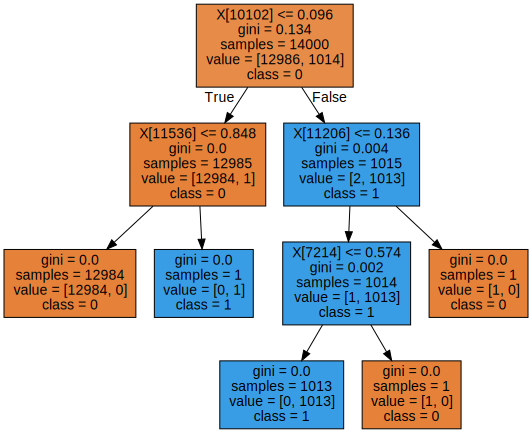

In [ ]:
g = export_graphviz(modelTree,class_names=["0","1"],filled=True)
gv.Source(g)

In [ ]:
y_hatTree = modelTree.predict(x_test)

Resultados: Accuracy y Matriz de confusión

In [ ]:
print(accuracy_score(y_hatTree,y_test))
print(confusion_matrix(y_hatTree,y_test))

0.9996666666666667
[[5582    0]
 [   2  416]]


#PREGUNTA 5
PREGUNTA: Emita conclusiones finales respecto al resultado de su experimentación con el
dataset.

RESPUESTA: 
Primero, pudimos observar que el dataset está sesgado, por la diferencia de distribución en la columna "funny?", puesto que hay muchos 0 y pocos 1.

Segundo, al aplicarle los 3 tipos de distancia (euclidiana, manhatam y coseno) pudimos observar que la distancia manhatam obtuvo mejores resultados.

Tercero, el mejor algoritmo para este dataset son los arboles de decision, porque obtuvo resultamos muy buenos y superiores a los de knn.

Cuarto, en cuanto a la limpieza de datos, una recomendación que se pudo hacer es disminuir las columnas, puesto que se pudo aplicar stemmers al momento de tokenizar, pero como aumenta bastante la complejidad, se decidió no acerlo)